<a href="https://colab.research.google.com/github/raghadalmoqhim/T5/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.shape

(12316, 32)

In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df.sample(6)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3890,8:15:00,Friday,Under 18,Male,NaN,Owner,NaN,NaN,Owner,Below 1yr,...,Turnover,Passenger,Female,Over 51,3,Driver,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
5240,19:14:00,Monday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Governmental,Above 10yr,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Overspeed,Slight Injury
9879,17:21:00,Thursday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1296,15:00:00,Thursday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
7925,17:00:00,Thursday,Unknown,Female,Junior high school,Employee,2-5yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
6293,16:50:00,Saturday,Unknown,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [9]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [10]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [15]:
df['Educational_level'].mode()

,Educational_level
0,Junior high school


In [19]:
df['Educational_level'].fillna('Junior high school', inplace=True)

In [20]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [21]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [22]:
df['Vehicle_driver_relation'].fillna('Unknown', inplace=True)

In [24]:
df['Driving_experience'].mode()

,Driving_experience
0,5-10yr


In [25]:
df['Driving_experience'].fillna('5-10yr', inplace=True)

In [26]:
df['Type_of_vehicle'].fillna('Unknown', inplace=True)

In [28]:
df['Owner_of_vehicle'].fillna('Other', inplace=True)

In [30]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [31]:
df['Service_year_of_vehicle'].mode()

,Service_year_of_vehicle
0,Unknown


In [32]:
df['Service_year_of_vehicle'].fillna('Unknown', inplace=True)

In [33]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [34]:
df['Defect_of_vehicle'].fillna('Unknown', inplace=True)

In [35]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [36]:
df['Area_accident_occured'].fillna('Unknown', inplace=True)

In [37]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [38]:
df['Lanes_or_Medians'].fillna('Unknown', inplace=True)

In [40]:
df['Road_allignment'].mode()

,Road_allignment
0,Tangent road with flat terrain


In [41]:
df['Road_allignment'].fillna('Tangent road with flat terrain', inplace=True)

In [42]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [43]:
df['Types_of_Junction'].fillna('Unknown', inplace=True)

In [45]:
df['Road_surface_type'].mode()

,Road_surface_type
0,Asphalt roads


In [46]:
df['Road_surface_type'].fillna('Asphalt roads', inplace=True)

In [48]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [49]:
df['Type_of_collision'].mode()

,Type_of_collision
0,Vehicle with vehicle collision


In [50]:
df['Type_of_collision'].fillna('Vehicle with vehicle collision', inplace=True)

In [53]:
df['Vehicle_movement'].mode()

,Vehicle_movement
0,Going straight


In [54]:
df['Vehicle_movement'].fillna('Going straight', inplace=True)

In [55]:
df['Work_of_casuality'].mode()

,Work_of_casuality
0,Driver


In [56]:
df['Work_of_casuality'].unique()

array([nan, 'Driver', 'Other', 'Unemployed', 'Employee', 'Self-employed',
       'Student', 'Unknown'], dtype=object)

In [57]:
df['Work_of_casuality'].fillna('Unknown', inplace=True)

In [60]:
df['Fitness_of_casuality'].describe()

,Fitness_of_casuality
count,9681
unique,5
top,Normal
freq,9608


In [59]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [61]:
df['Fitness_of_casuality'].fillna('Normal', inplace=True)

In [62]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
columns_to_convert = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
                       'Educational_level', 'Type_of_vehicle', 'Cause_of_accident',
                       'Accident_severity', 'Vehicle_driver_relation', 'Driving_experience',
                       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
                       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
                       'Types_of_Junction', 'Road_surface_type', 'Type_of_collision',
                       'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']

# Convert the specified columns back to object dtype
df[columns_to_convert] = df[columns_to_convert].astype('object')

# Verify the changes
print(df.dtypes)

In [78]:
df['Number_of_casualties'] = df['Number_of_casualties'].astype('int64')
df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].astype('int64')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns to scale (excluding the target variable)
numerical_cols = ['Age_band_of_driver', 'Driving_experience', 'Service_year_of_vehicle']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [63]:
df.select_dtypes(exclude=['number'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Unknown,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [74]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7984,337,1,0.75,1,0,0,0.166667,7,3,0.6,...,3,0,1,1,2,0,2,5,13,2
5931,739,0,0.25,1,0,0,0.166667,3,3,0.6,...,2,0,1,0,2,2,2,5,5,2
12134,207,0,0.0,1,0,0,0.0,0,3,1.0,...,2,3,2,5,3,6,2,5,10,2
3852,481,2,0.0,1,0,0,0.5,5,3,1.0,...,2,3,2,5,3,6,2,5,12,2
8889,408,3,1.0,0,0,0,0.333333,17,3,1.0,...,2,2,1,1,1,0,2,0,3,2
11813,141,2,0.0,1,0,0,0.333333,5,3,0.4,...,2,2,0,4,2,0,2,5,11,2
11061,718,6,0.25,1,0,0,0.166667,0,3,1.0,...,2,0,1,0,2,1,2,5,16,2
606,516,0,0.0,1,0,2,0.166667,0,3,1.0,...,2,3,2,5,3,3,3,5,1,2
7294,484,2,0.0,1,0,2,0.333333,0,0,0.8,...,2,1,0,1,2,0,2,5,11,0
3180,568,6,0.0,1,0,0,0.333333,4,3,0.2,...,3,3,2,5,3,0,2,5,12,2


In [90]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Type_of_vehicle', 'Cause_of_accident', 'Vehicle_driver_relation',
                   'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
                   'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
                   'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
                   'Fitness_of_casuality']


encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

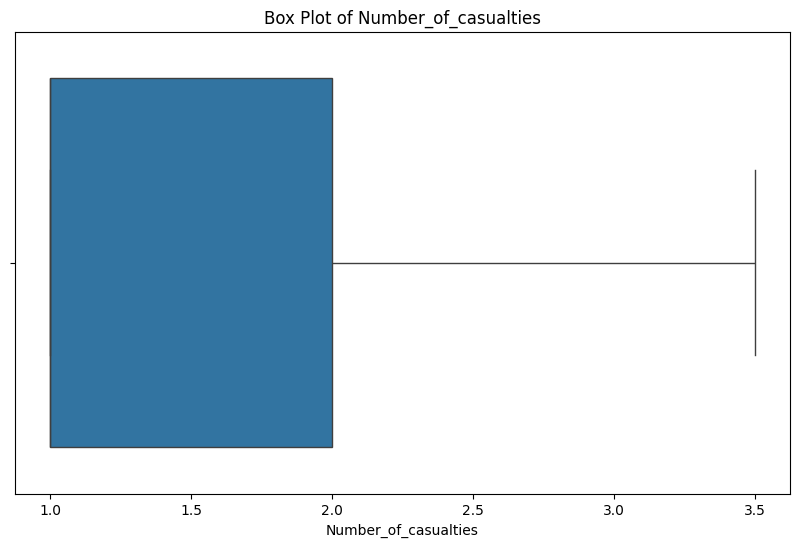

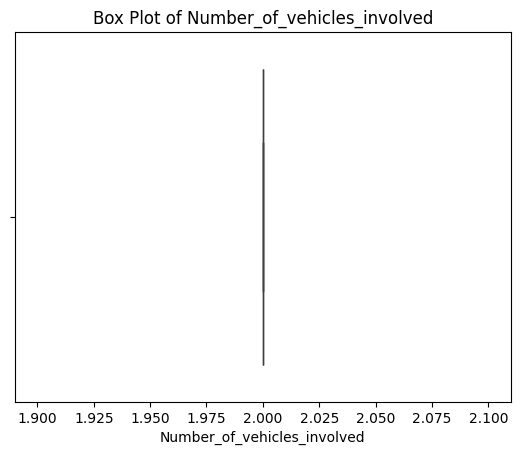

In [105]:
numerical_cols = ['Number_of_casualties', 'Number_of_vehicles_involved']

# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
for col in numerical_cols:
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [98]:
# Calculate IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25, axis=0)
Q3 = df[numerical_cols].quantile(0.75, axis=0)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df[numerical_cols] = np.clip(df[numerical_cols], lower_bound, upper_bound, axis=1)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [109]:
df2 = df.groupby('Type_of_vehicle').agg({'Weather_conditions': 'mean', 'Type_of_collision': 'mean'}, inplace = True)
print(df2)

                Weather_conditions Type_of_collision
Type_of_vehicle                                     
0                         2.403432          6.334165
1                         2.482759          6.103448
2                          2.47619          6.142857
3                         2.438642          6.563969
4                         2.380776          6.469501
5                         2.412626          6.400732
6                         2.491525          5.836158
7                         2.457781          6.451159
8                         2.443896          6.352651
9                         2.412096          6.351617
10                        2.396617          6.359023
11                        2.373762          6.502475
12                        2.342105          6.947368
13                        2.345238          7.059524
14                        2.407569          6.628821
15                         2.45283          6.588679
16                         2.73913          6.

TypeError: Image data of dtype object cannot be converted to float

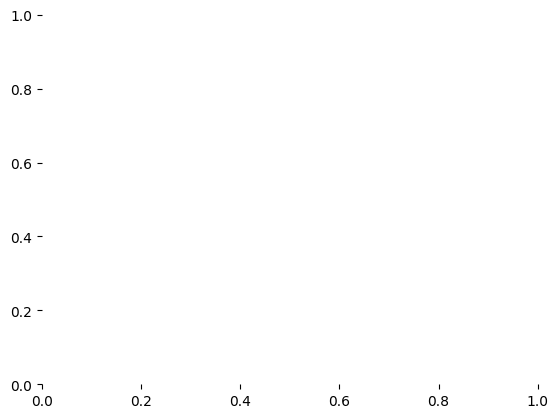

In [110]:
sns.heatmap(df2 , annot= True)
plt.title("How Type of vehicle effect on Type of collision and Type of vehicle" )
plt.show()

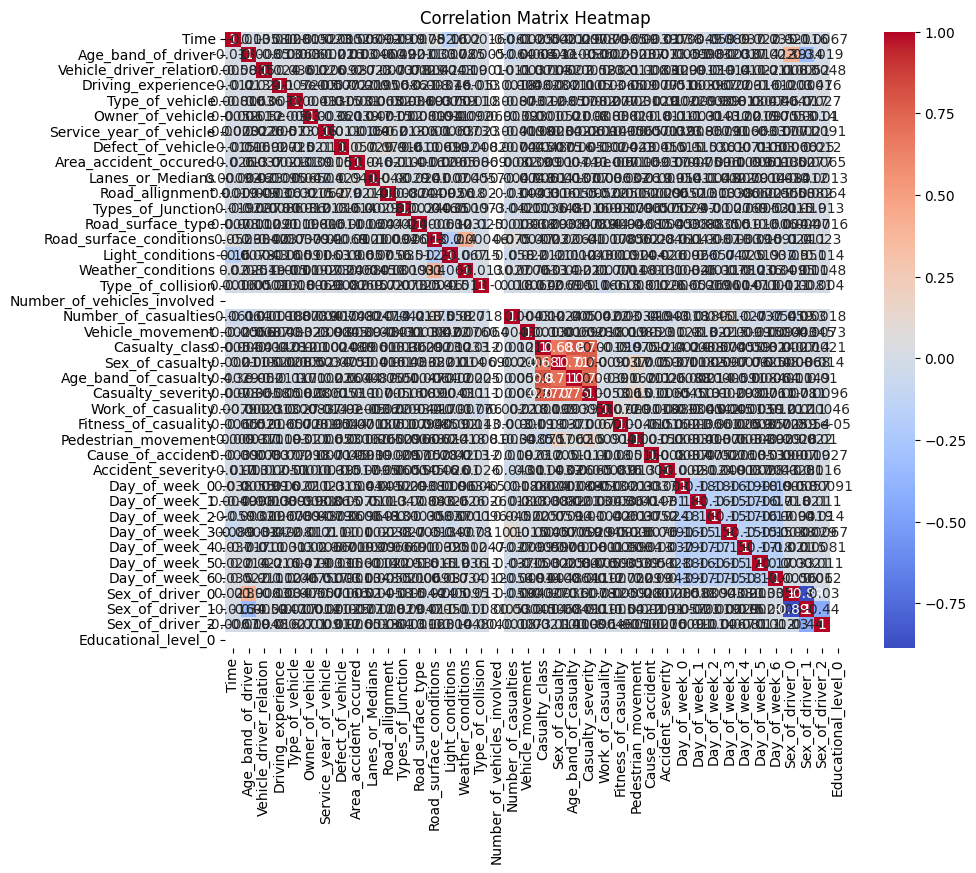

In [106]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

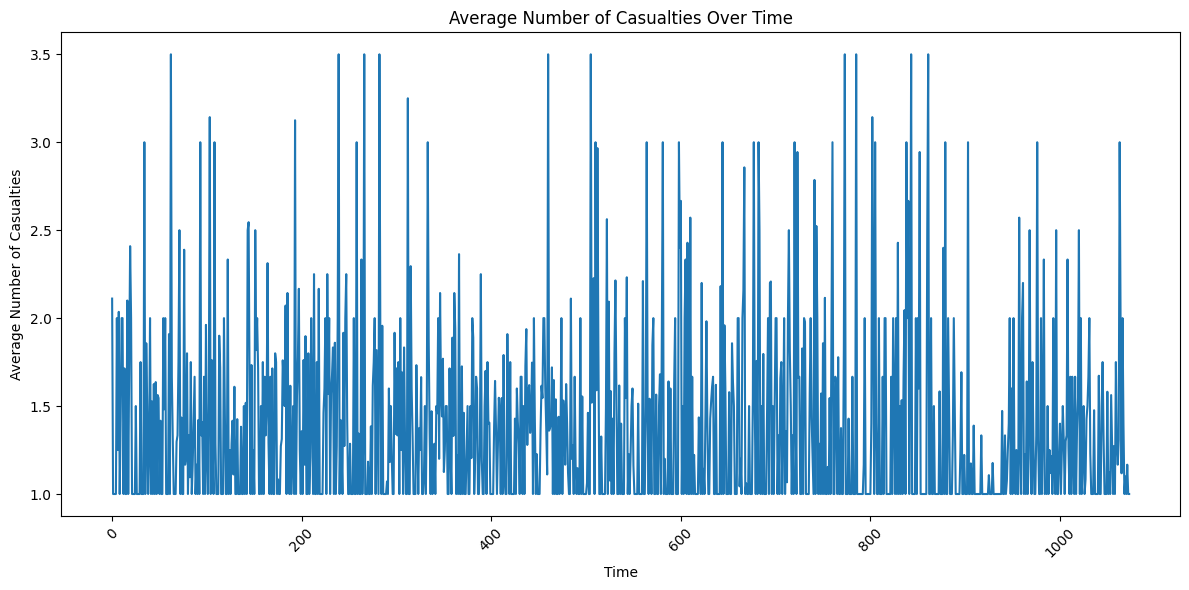

In [101]:
#line plot
time_casualties = df.groupby('Time')['Number_of_casualties'].mean()
plt.figure(figsize=(12, 6))
plt.plot(time_casualties.index, time_casualties.values)
plt.xlabel('Time')
plt.ylabel('Average Number of Casualties')
plt.title('Average Number of Casualties Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [104]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9852, 150)
X_test shape: (2464, 150)
y_train shape: (9852,)
y_test shape: (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [124]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (example using Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.17173525963122518


In [130]:

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Unique classes in the target:", np.unique(y))


Unique classes in the target: [0 1]


In [131]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Logistic Regression

In [135]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.855
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



#### Decision Tree Classifier

In [137]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf_pred = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_clf_pred))
print("Decision Tree Report:\n", classification_report(y_test, tree_clf_pred))

Decision Tree Accuracy: 0.85
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        93
           1       0.91      0.80      0.85       107

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



#### Support Vector Machine (SVM)

In [138]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_clf_pred))
print("SVM Report:\n", classification_report(y_test, svm_clf_pred))

SVM Accuracy: 0.845
SVM Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



#### K-Neighbors Classifier

In [140]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf_pred = knn_clf.predict(X_test)
print("K-Neighbors Accuracy:", accuracy_score(y_test, knn_clf_pred))
print("K-Neighbors Report:\n", classification_report(y_test, knn_clf_pred))

K-Neighbors Accuracy: 0.81
K-Neighbors Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

Logistic Regression Confusion Matrix:
 [[85  8]
 [21 86]]
Logistic Regression Accuracy: 0.855
Logistic Regression Precision: 0.9148936170212766
Logistic Regression Recall: 0.8037383177570093
Logistic Regression F1 Score: 0.8557213930348259
Logistic Regression ROC AUC: 0.9216159179981912


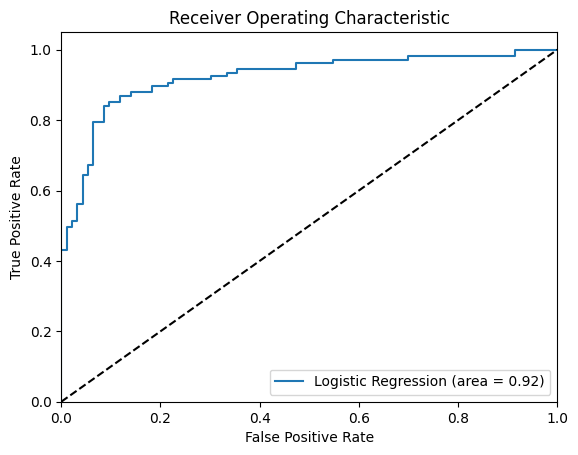

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, log_reg_pred)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)

# Accuracy
accuracy_log_reg = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", accuracy_log_reg)

#Precision and Recall
precision_log_reg = precision_score(y_test, log_reg_pred)
recall_log_reg = recall_score(y_test, log_reg_pred)
print("Logistic Regression Precision:", precision_log_reg)
print("Logistic Regression Recall:", recall_log_reg)

#F1 Score
f1_log_reg = f1_score(y_test, log_reg_pred)
print("Logistic Regression F1 Score:", f1_log_reg)

#ROC Curve and AUC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
print("Logistic Regression ROC AUC:", roc_auc_log_reg)

#ROC Curve
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

K-Neighbors Classifier Confusion Matrix:
 [[82 11]
 [27 80]]
K-Neighbors Classifier Accuracy: 0.81
K-Neighbors Classifier Precision: 0.8791208791208791
K-Neighbors Classifier Recall: 0.7476635514018691
K-Neighbors Classifier F1 Score: 0.808080808080808
K-Neighbors Classifier ROC AUC: 0.9216159179981912


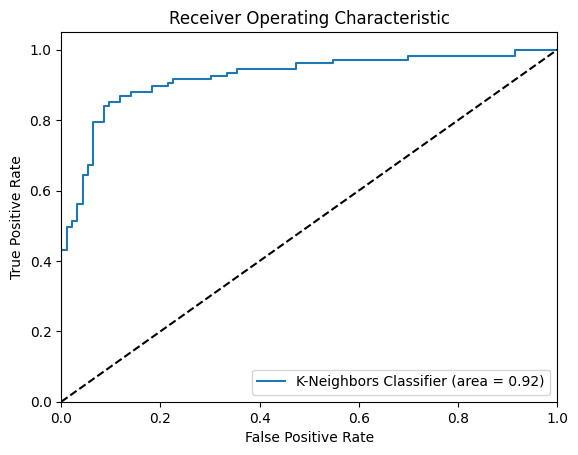

In [150]:

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_clf_pred)
print("K-Neighbors Classifier Confusion Matrix:\n", conf_matrix_knn)

# Accuracy
accuracy_knn = accuracy_score(y_test, knn_clf_pred)
print("K-Neighbors Classifier Accuracy:", accuracy_knn)

#Precision and Recall
precision_knn = precision_score(y_test, knn_clf_pred)
recall_knn = recall_score(y_test, knn_clf_pred)
print("K-Neighbors Classifier Precision:", precision_knn)
print("K-Neighbors Classifier Recall:", recall_knn)

#F1 Score
f1_knn = f1_score(y_test, knn_clf_pred)
print("K-Neighbors Classifier F1 Score:", f1_knn)

#ROC Curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("K-Neighbors Classifier ROC AUC:", roc_auc_knn)

#ROC Curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='K-Neighbors Classifier (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

at the end I have some problem in dataset type I cant handle it (valueerror: unknown label type: unknown. maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.) and trying to simulation model.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: